In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [4]:
df

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

In [5]:
df.shape

(8807, 12)

In [6]:
df.iloc[:,[2,3]]

title         director
0      Dick Johnson Is Dead  Kirsten Johnson
1             Blood & Water              NaN
2                 Ganglands  Julien Leclercq
3     Jailbirds New Orleans              NaN
4              Kota Factory              NaN
...                     ...              ...
8802                 Zodiac    David Fincher
8803            Zombie Dumb              NaN
8804             Zombieland  Ruben Fleischer
8805                   Zoom     Peter Hewitt
8806                 Zubaan      Mozez Singh

[8807 rows x 2 columns]

In [7]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [8]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
print(df.duplicated().sum())

0


In [11]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [12]:
df.tail()

show_id     type        title         director  \
8802   s8803    Movie       Zodiac    David Fincher   
8803   s8804  TV Show  Zombie Dumb              NaN   
8804   s8805    Movie   Zombieland  Ruben Fleischer   
8805   s8806    Movie         Zoom     Peter Hewitt   
8806   s8807    Movie       Zubaan      Mozez Singh   

                                                   cast        country  \
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

             date_added  release_year rating   duration  \
8802  November 20, 2019          2007      R    158 min   
8803       July 1, 2019          2018  TV-Y7  2 Seasons   
8804   November 1, 2019          2009      R     88 min   
8805   January 11, 2020          2006     PG     88 min   
8806      March 2, 2019          2015  TV-14    111 min   

                                           listed_in  \
8802                  Cult Movies, Dramas, Thrillers   
8803          Kids' TV, Korean TV Shows, TV Comedies   
8804                         Comedies, Horror Movies   
8805              Children & Family Movies, Comedies   
8806  Dramas, International Movies, Music & Musicals   

                                            description  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...

In [13]:
df.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [14]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
df["release_year"].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [16]:
df["release_year"].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
2001      45
1999      39
1997      38
2000      37
1998      36
1993      28
1995      25
1996      24
1992      23
1994      22
1990      22
1988      18
1982      17
1991      17
1989      16
1981      13
1986      13
1984      12
1980      11
1979      11
1983      11
1985      10
1973      10
1976       9
1987       8
1977       7
1974       7
1975       7
1978       7
1972       5
1967       5
1971       5
1960       4
1945       4
1944       3
1955       3
1968       3
1962       3
1943       3
1958       3
1964       2
1969       2
1970       2
1963       2
1956       2
1965       2
1946       2
1942       2
1954       2
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, dtype: int64

In [17]:
df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [18]:
df["country"].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [19]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [20]:
df = df.dropna()  

In [21]:
df

show_id     type                                              title  \
7         s8    Movie                                            Sankofa   
8         s9  TV Show                      The Great British Baking Show   
9        s10    Movie                                       The Starling   
12       s13    Movie                                       Je Suis Karl   
24       s25    Movie                                              Jeans   
27       s28    Movie                                          Grown Ups   
28       s29    Movie                                         Dark Skies   
29       s30    Movie                                           Paranoia   
38       s39    Movie                                Birth of the Dragon   
41       s42    Movie                                               Jaws   
42       s43    Movie                                             Jaws 2   
43       s44    Movie                                             Jaws 3   
44       s45    Movie                                  Jaws: The Revenge   
46       s47    Movie                                         Safe House   
48       s49    Movie                                       Training Day   
51       s52    Movie  InuYasha the Movie 2: The Castle Beyond the Lo...   
52       s53    Movie  InuYasha the Movie 3: Swords of an Honorable R...   
53       s54    Movie    InuYasha the Movie 4: Fire on the Mystic Island   
54       s55    Movie  InuYasha the Movie: Affections Touching Across...   
56       s57    Movie           Naruto Shippuden the Movie: Blood Prison   
57       s58    Movie                  Naruto Shippûden the Movie: Bonds   
58       s59    Movie       Naruto Shippûden the Movie: The Will of Fire   
59       s60    Movie                        Naruto Shippuden: The Movie   
60       s61    Movie        Naruto Shippuden: The Movie: The Lost Tower   
61       s62    Movie   Naruto the Movie 2: Legend of the Stone of Gelel   
62       s63    Movie  Naruto the Movie 3: Guardians of the Crescent ...   
63       s64    Movie  Naruto the Movie: Ninja Clash in the Land of Snow   
73       s74    Movie                                       King of Boys   
81       s82    Movie                                               Kate   
84       s85    Movie                               Omo Ghetto: the Saga   
90       s91    Movie                                     Paradise Hills   
94       s95    Movie                                          Show Dogs   
96       s97    Movie  If I Leave Here Tomorrow: A Film About Lynyrd ...   
105     s106    Movie                                   Angamaly Diaries   
107     s108    Movie                                   A Champion Heart   
114     s115    Movie                                             Anjaam   
115     s116    Movie                                        Bright Star   
116     s117    Movie                                             Dhanak   
118     s119    Movie                                            Gurgaon   
122     s123    Movie                                         In the Cut   
126     s127    Movie                                            Shikara   
127     s128    Movie                                 A Cinderella Story   
129     s130    Movie                                 An Unfinished Life   
131     s132    Movie                        Blade Runner: The Final Cut   
133     s134    Movie                                            Chappie   
134     s135    Movie                           Clear and Present Danger   
135     s136    Movie                                        Cliffhanger   
136     s137    Movie                                      Cold Mountain   
137     s138    Movie                    Crocodile Dundee in Los Angeles   
138     s139    Movie                                          Dear John   
139     s140    Movie                                 Do the Right Thing   
140     s141    Movie                El patrón, radio

In [22]:
df.fillna

<bound method NDFrame.fillna of      show_id     type                                              title  \
7         s8    Movie                                            Sankofa   
8         s9  TV Show                      The Great British Baking Show   
9        s10    Movie                                       The Starling   
12       s13    Movie                                       Je Suis Karl   
24       s25    Movie                                              Jeans   
27       s28    Movie                                          Grown Ups   
28       s29    Movie                                         Dark Skies   
29       s30    Movie                                           Paranoia   
38       s39    Movie                                Birth of the Dragon   
41       s42    Movie                                               Jaws   
42       s43    Movie                                             Jaws 2   
43       s44    Movie                                   

In [23]:
df_null = round(df.isnull().sum()*100/len(df))
df_null

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [24]:
df_null = round(df.isnull().sum()*100/len(df),2)
df_null

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [25]:
#drop columns which have null values more than 30%

null_v = df_null[df_null >= 30]
null_v

Series([], dtype: float64)

In [26]:
null_v.index

Index([], dtype='object')

In [27]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [28]:
df['release_year'].describe()

count    5332.000000
mean     2012.742123
std         9.625831
min      1942.000000
25%      2011.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

In [29]:
q3 = np.percentile(df['release_year'],75)
q1 = np.percentile(df['release_year'],25)

In [30]:
q3,q1

(2018.0, 2011.0)

In [31]:
iqr = q3 - q1
iqr

7.0

In [32]:
ub = q3 + (1.5 * iqr)
lb = q1 - (1.5 * iqr)

In [33]:
ub

2028.5

In [34]:
lb

2000.5

In [35]:
#filtering DATA WITHOUT OUTLIERS
df=df[(df['release_year']<=ub) & (df['release_year']>=lb)]

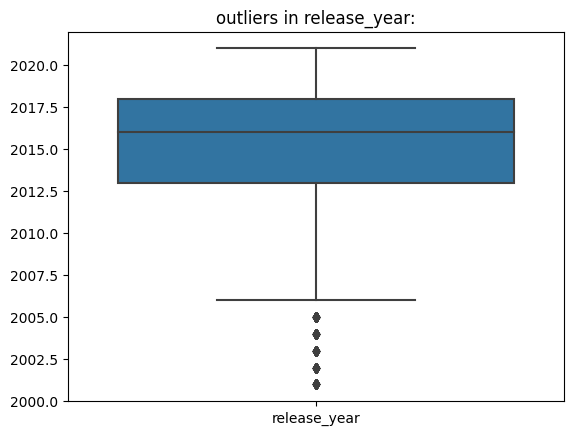

In [36]:
sns.boxplot(df[['release_year']]);
plt.title('outliers in release_year:'); 

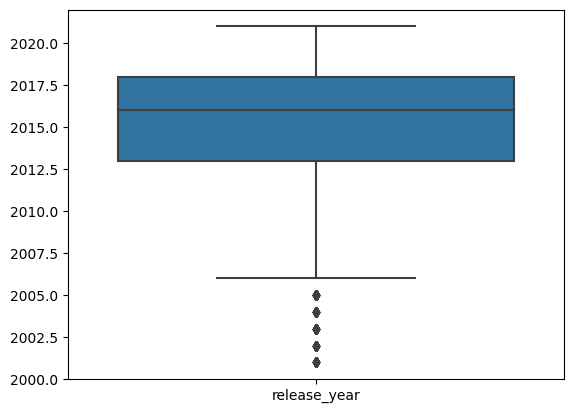

In [37]:
sns.boxplot(df)
plt.show()

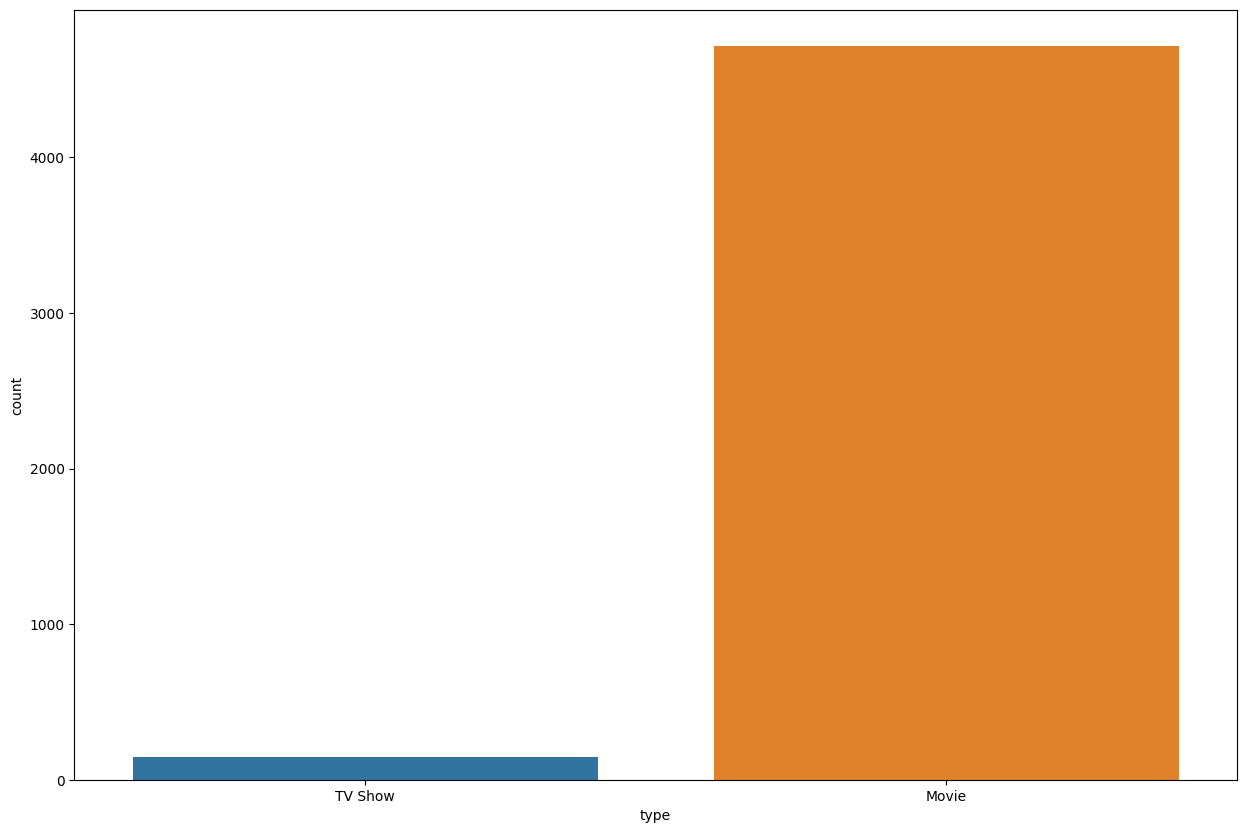

In [38]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='type')
plt.show()

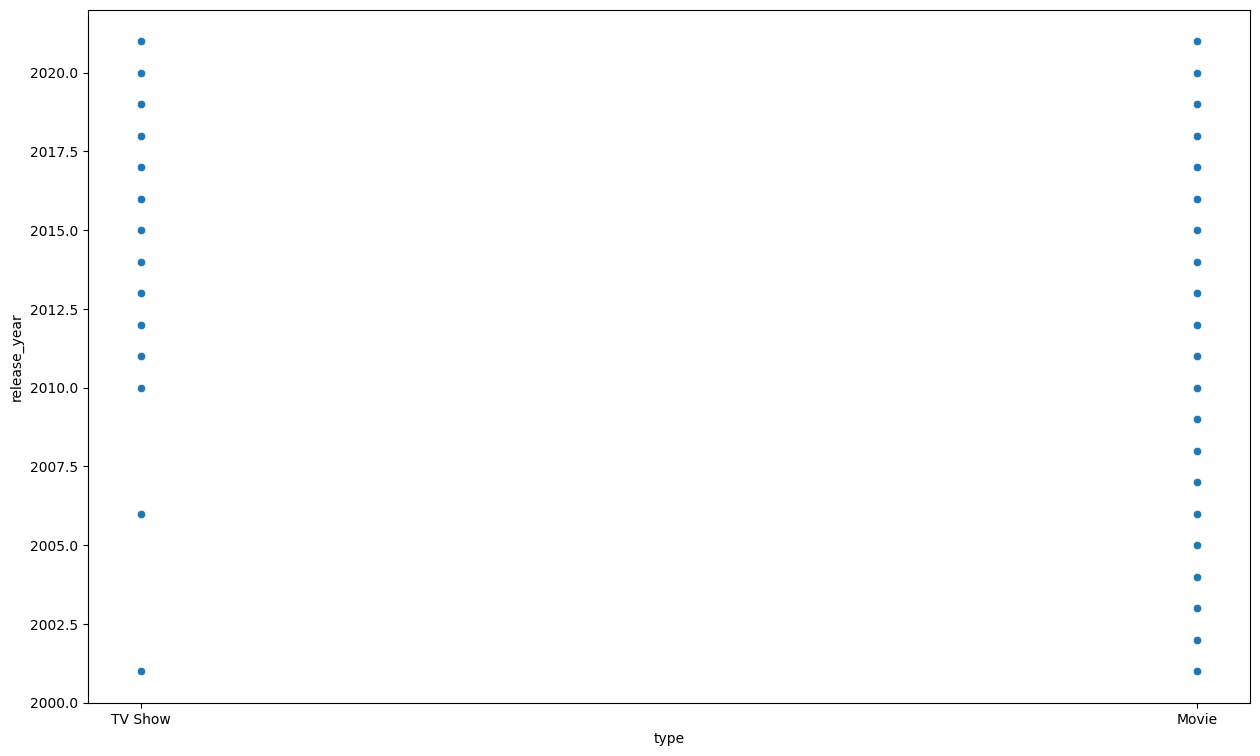

In [39]:
plt.figure(figsize=(15, 9))
sns.scatterplot(data=df, x='type', y='release_year')
plt.show()

<Axes: >

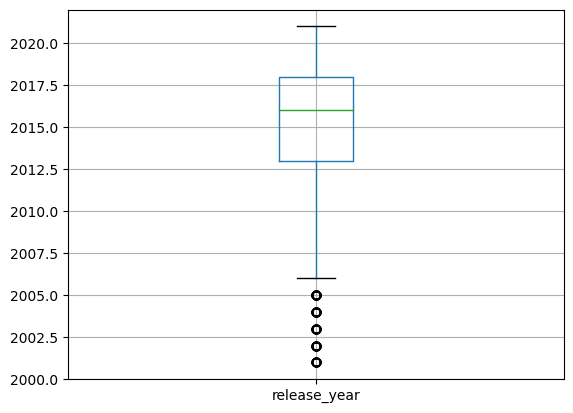

In [40]:
df.boxplot()

<Axes: >

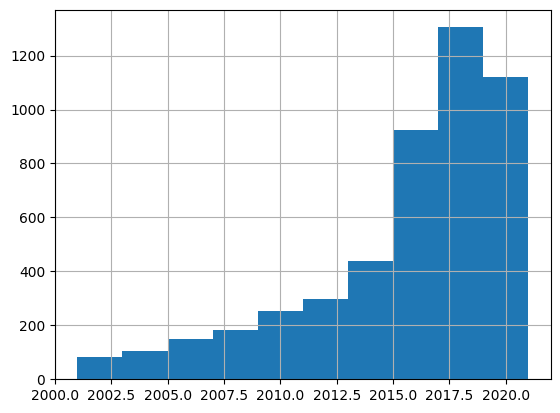

In [41]:
df['release_year'].hist()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='type', ylabel='Count'>

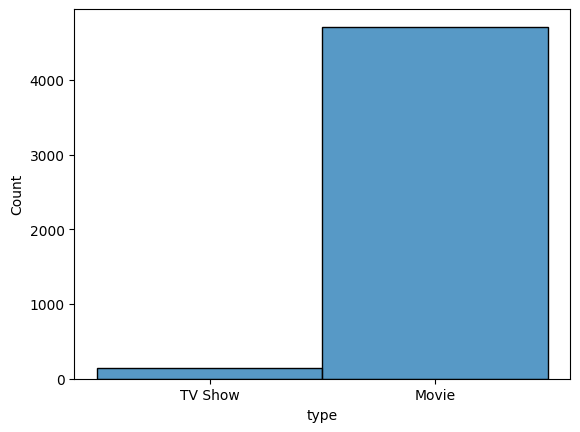

In [42]:
sns.histplot(df['type'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='release_year', ylabel='Count'>

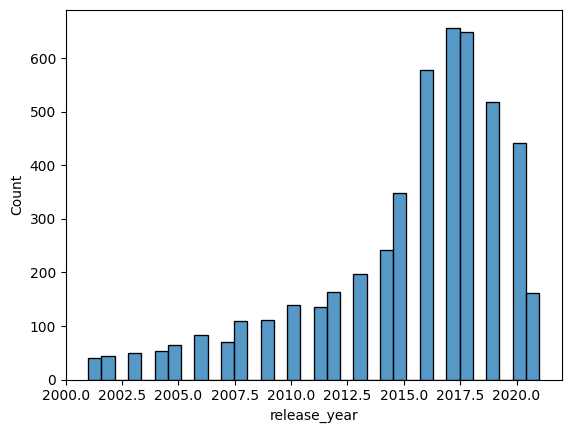

In [43]:
sns.histplot(df['release_year'])

<Axes: >

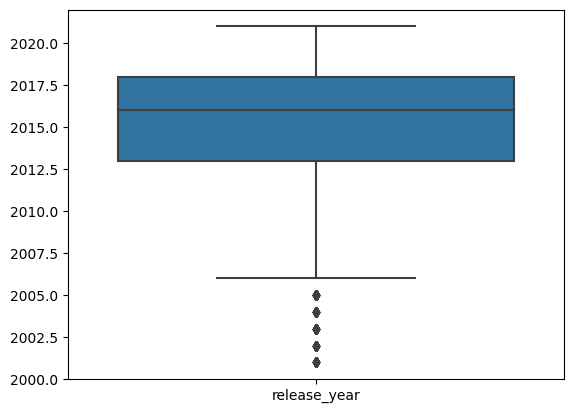

In [44]:
sns.boxplot(df[['release_year']])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='type', ylabel='release_year'>

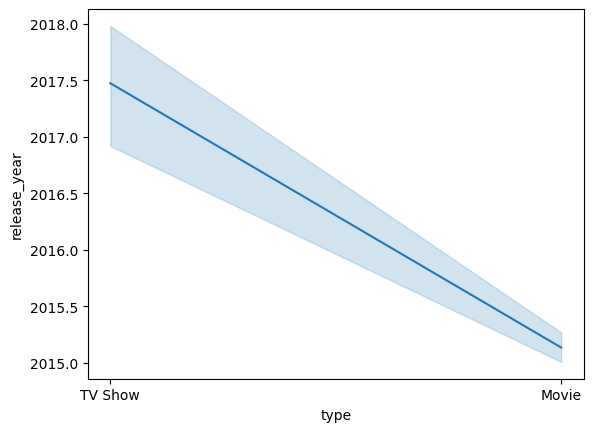

In [45]:
sns.lineplot(x='type', y='release_year', data=df)

<Axes: xlabel='type', ylabel='release_year'>

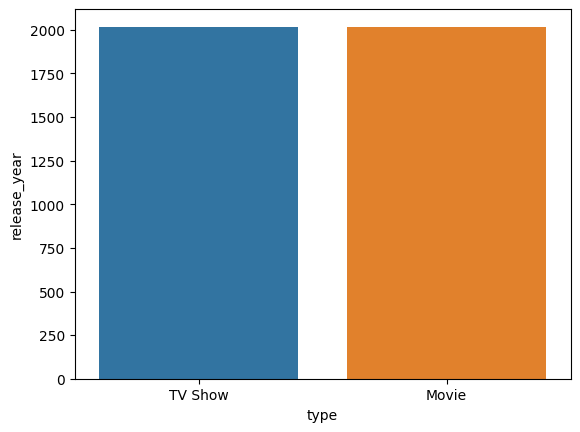

In [46]:
sns.barplot(x='type', y='release_year', data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


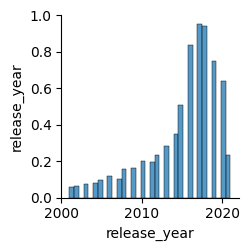

In [47]:
sns.pairplot(df)

In [48]:
df.min()

show_id                                                       s10
type                                                        Movie
title                                                      #Alive
director                                              A. L. Vijay
cast            50 Cent, Ryan Phillippe, Bruce Willis, Rory Ma...
country                                         , France, Algeria
date_added                                         August 4, 2017
release_year                                                 2001
rating                                                          G
duration                                                 1 Season
listed_in                                      Action & Adventure
description     "Brooklyn Nine-Nine" star Chelsea Peretti show...
dtype: object

In [49]:
df.max()

show_id                                                      s997
type                                                      TV Show
title                                                     반드시 잡는다
director                                             Şenol Sönmez
cast            Ṣọpẹ́ Dìrísù, Wunmi Mosaku, Matt Smith, Malaik...
country                                                  Zimbabwe
date_added                                      September 9, 2021
release_year                                                 2021
rating                                                         UR
duration                                                   99 min
listed_in                                               Thrillers
description     Zixin is about to marry Qihong, but her galliv...
dtype: object